# Representação Geométrica de Vetores e Álgebra Linear no Espaço Vetorial

#### Instalando pacotes necessários para o projeto
!pip install -q pandas_datareader

https://pandas-datareader.readthedocs.io/en/latest

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import wb
from scipy.optimize import minimize

plt.rcParams.update({'font.size': 14})

In [2]:
#versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



### Estrutura de dados para criação de vetores em python

In [3]:
# cria um vetor como lista em python
dsa_vetor1 = [1, 2, 3]
print(f'type: {type(dsa_vetor1)}')
print(f'shape: {np.shape(dsa_vetor1)}')

type: <class 'list'>
shape: (3,)


In [4]:
# cria um vetor como array NumPy (é muito melhor do que list)
dsa_vetor2 = np.array([1, 2, 3])
print(f'type: {type(dsa_vetor2)}')
print(f'shape: {dsa_vetor2.shape}')

type: <class 'numpy.ndarray'>
shape: (3,)


In [5]:
# cria um vetor de 1 linha com 3 colunas (matriz)
dsa_vetor3 = np.array([ [1, 2, 3] ])
print(f'type: {type(dsa_vetor3)}')
print(f'shape: {dsa_vetor3.shape}')

type: <class 'numpy.ndarray'>
shape: (1, 3)


In [6]:
# cria um vetor de 3 linhas e 1 coluna (matriz)
dsa_vetor4 = np.array([ [1], [2], [3]])
print(f'type: {type(dsa_vetor4)}')
print(f'shape: {dsa_vetor4.shape}')

type: <class 'numpy.ndarray'>
shape: (3, 1)


### Geometria de vetores e representação em python

https://matplotlib.org/stable/users/index.html

In [7]:
# define o vetor

u = np.array([-2, 3])
print(u)

[-2  3]


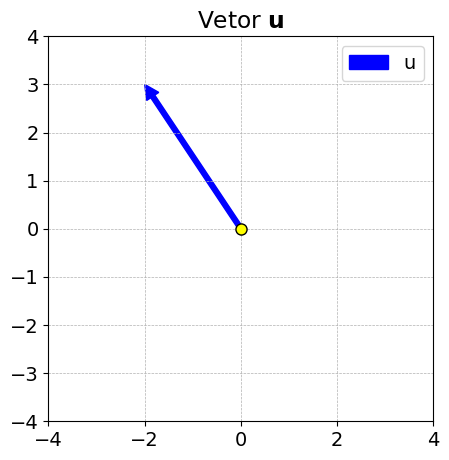

In [8]:
# exemplo 1

#criar figura
plt.figure(figsize=(5, 5))

# definir 3 vetores
# vetor u
vetor1 = plt.arrow(0, #coordenadas do ponto de partida x
                   0, #coordenadas do ponto de partida y
                   u[0], #até onde vai o vetor no eixo x (-2)
                   u[1], #até onde vai o vetor no eixo y (3)
                   head_width=0.3, #comprimento da cabeça da flexa
                   head_length=0.3, 
                   width=0.1,
                   color='blue',
                   length_includes_head=True    
)

# ponto de inicio do vetor
plt.plot(0, 0, 'ko', markerfacecolor='yellow', markersize=8)

# formatação do plot
plt.grid(linestyle='--', linewidth=0.5)
plt.axis('square')
plt.axis([-4, 4, -4, 4]) #delimitação  da escala do quadro
plt.legend([vetor1], ['u'])
plt.title(r'Vetor $\mathbf{u}$') # deixa a letra em negrito (r antes serve para ignorar qualquer scape com string em LaTeX)
plt.savefig('imagens/grafico_01.png', dpi=300) #salva o gráfico em png
plt.show()


Vetores: [[ 3 -2]
 [-1  4]
 [ 2 -3]]
Origens: [[ 0 -1 -2]
 [ 0 -2 -1]]


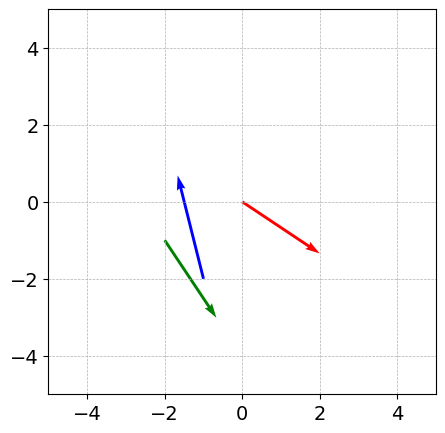

In [9]:
# exemplo 2

#criar figura
plt.figure(figsize=(5, 5))

# cria um array de vetores
vetores = np.array([ [3, -2], [-1, 4], [2, -3] ])
print(f'Vetores: {vetores}')

# cria um array de vetores para as origens
origens = np.array([ [0, -1, -2], [0, -2, -1] ])
print(f'Origens: {origens}')

# plot
plt.quiver(*origens, vetores[:,0], vetores[:,1], color=['r', 'b', 'g'], scale=15)
plt.grid(linestyle='--', linewidth=0.5)

# escala
plt.axis([-5, 5, -5, 5])

# salvar gráfico
plt.savefig('imagens/grafico_02.png', dpi=300, bbox_inches='tight')

plt.show()


### Adição de vetores no espaço vetorial

In [10]:
# define os vetores como array numpy
v1 = np.array([1, 2])
v2 = np.array([4, -6])
soma = v1 + v2
print(f'u:{v1} + v:{v2} = {soma}' )

u:[1 2] + v:[ 4 -6] = [ 5 -4]


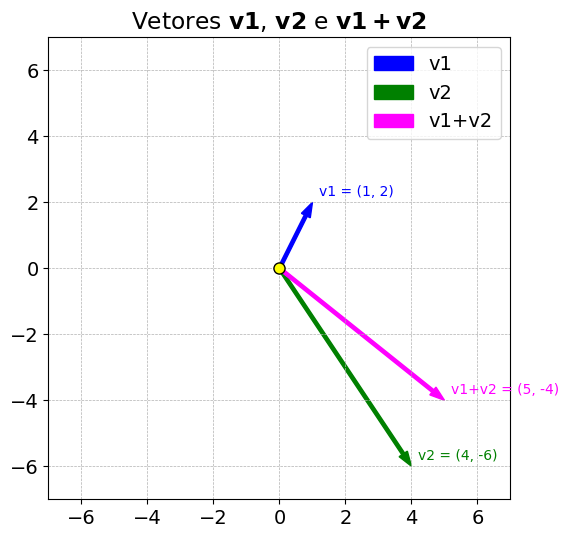

In [11]:
# plot dos 3 vetores

plt.figure(figsize=(6, 6))

vetor1 = plt.arrow(0, 0, v1[0], v1[1], head_width=0.3, width=.1, color='blue', length_includes_head=True)
vetor2 = plt.arrow(0, 0, v2[0], v2[1], head_width=0.3, width=.1, color='green', length_includes_head=True)
vetor3 = plt.arrow(0, 0, soma[0], soma[1], head_width=0.3, width=.1, color='magenta', length_includes_head=True )

plt.plot(0,0, 'ko' , markerfacecolor='yellow', markersize=8)

plt.grid(linestyle='--', linewidth=0.5)
plt.axis('square')
plt.axis([-7, 7, -7, 7])
plt.text(v1[0] + 0.2, v1[1] + 0.2, f'v1 = ({v1[0]}, {v1[1]})', color='blue', fontsize=10)
plt.text(v2[0] + 0.2, v2[1] + 0.2, f'v2 = ({v2[0]}, {v2[1]})', color='green', fontsize=10)
plt.text(soma[0] + 0.2, soma[1] + 0.2, f'v1+v2 = ({soma[0]}, {soma[1]})', color='magenta', fontsize=10)
plt.legend([vetor1, vetor2, vetor3], ['v1', 'v2', 'v1+v2'])
plt.title(r'Vetores $\mathbf{v1}$, $\mathbf{v2}$ e $\mathbf{v1+v2}$')
plt.savefig('imagens/grafico_03.png', dpi=300, bbox_inches='tight')
plt.show()



Propiedades:
O vetor resultante da soma de dois vetores não necessáriamente tem a mesma direção de um dos vetores originais. A direção do vetor resultante depende das magnitudes e direções dos vetores originais. Aqui estão alguns cenários para ilustrar isso:

**Mesma direção e sentido:** Se dois vetores estão na mesma direção e tem o mesmo sentido (ou seja, não são opostos), o vetor resultante também terá a mesma direção e sentido, mas com uma magnitude maior. Por exemplo, somar [2, 2] e [1, 1] resulta em [3, 3], que está na mesma direção e sentido.

**Direções diferentes"** Se os vetores estão em direções diferentes, o vetor resultante terá uma direção que é uma "média" ponderada das direções originais, dependendo das magnitudes dos vetores. Por exemplo, somar [1, 0] e [0, 1] resulta em [1, 1] que está em uma nova direção.

**Vetores opostos:** Se os vetores são exatamente opostos (mesma magnitude, direções opostas), a soma resultará no vetor zero, o qual tecnicamente não tem uma direção definida. Por exemplo, somar [1, 0] e [-1, 0] resulta em [0, 0].

**Um vetor é multiplo do outro:** se um vetor é multiplo escalar do outro, a soma resultará em um vetor que tem a mesma direção de ambos os vetores originais, mas com uma magnitude que é a soma (ou diferença, dependendo do sinal do escalar) das magnitudes. Por exemplo, somar [1, 1] e [-2, 2] resultará em [-1, 1], que está na mesma direção, mas com uma magnitude e sentido diferentes.

Portanto, a direção do vetor resultante da soma de dois vetores depende de suas magnitudes e direções relativas.


| Também podemos somar os vetores da seguinte maneira:

In [12]:
a = np.array([4, 3, 2])
b = np.array([1, 5, 7])
print(f'a = {a} \nb = {b}')

a = [4 3 2] 
b = [1 5 7]


In [13]:
# Cria um array vazio
c = np.empty(3)
c

array([6.40986893, 7.32996556, 6.40986893])

In [14]:
# também podemos somar vetores assim (resultado em formato Float)
c[0] = a[0] + b[0]
c[1] = a[1] + b[1]
c[2] = a[2] + b[2]
print(c)

[5. 8. 9.]


In [15]:
# o mesmo que isso (resultado em formato INT)
c = a + b
print(c)

[5 8 9]


### Subtração e vetores no espaço vetorial

In [16]:

diff = v1 - v2 # v1 - v2
print(f'v1: {v1}')
print(f'v2: {v2}')
print(f'subtração: {diff}')


v1: [1 2]
v2: [ 4 -6]
subtração: [-3  8]


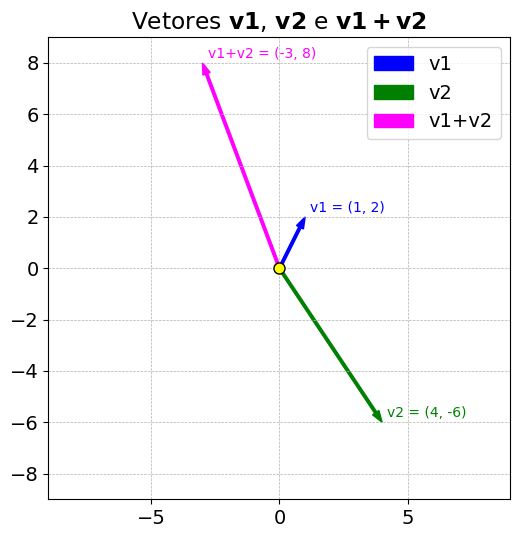

In [17]:
# plot dos 3 vetores

plt.figure(figsize=(6, 6))

vetor1 = plt.arrow(0, 0, v1[0], v1[1], head_width=0.3, width=.1, color='blue', length_includes_head=True)
vetor2 = plt.arrow(0, 0, v2[0], v2[1], head_width=0.3, width=.1, color='green', length_includes_head=True)
vetor3 = plt.arrow(0, 0, diff[0], diff[1], head_width=0.3, width=.1, color='magenta', length_includes_head=True)

plt.plot(0,0, 'ko' , markerfacecolor='yellow', markersize=8)

plt.grid(linestyle='--', linewidth=0.5)
plt.axis('square')
plt.axis([-9, 9, -9, 9])
plt.text(v1[0] + 0.2, v1[1] + 0.2, f'v1 = ({v1[0]}, {v1[1]})', color='blue', fontsize=10)
plt.text(v2[0] + 0.2, v2[1] + 0.2, f'v2 = ({v2[0]}, {v2[1]})', color='green', fontsize=10)
plt.text(diff[0] + 0.2, diff[1] + 0.2, f'v1+v2 = ({diff[0]}, {diff[1]})', color='magenta', fontsize=10)
plt.legend([vetor1, vetor2, vetor3], ['v1', 'v2', 'v1+v2'])
plt.title(r'Vetores $\mathbf{v1}$, $\mathbf{v2}$ e $\mathbf{v1+v2}$')
plt.savefig('imagens/grafico_03.png', dpi=300, bbox_inches='tight')
plt.show()



### Multiplicação Escalar no espaço vetorial

In [18]:
# valor escalar
valor_escalar = 3

#vetor
vetor = np.array([5, 4])

#resultado
resultado = vetor * valor_escalar
print(f'O resultado do vetor {vetor} * valor escalar {valor_escalar} é: {resultado}')

O resultado do vetor [5 4] * valor escalar 3 é: [15 12]


In [19]:
# outras operações escalares
num = 2
print(f'soma: {vetor + num}')
print(f'subtração: {vetor - num}')
print(f'divisão: {vetor / num}')
print(f'potenciação: {vetor ** num}')

soma: [7 6]
subtração: [3 2]
divisão: [2.5 2. ]
potenciação: [25 16]


In [20]:
# cuidado
print(num - vetor)

[-3 -2]


Propriedades:

A direção do vetor resultante de uma multiplicação escalar em um espaço vetorial, é diretamente relacionada à direção do vetor original antes da multiplicação. Quando um vetor é multiplicado por um escalar, apenas a magnitude do vetor é alterada (aumentada ou diminuída, dependendo do valor absoluto do escalar), enquanto a direção permanece a mesma ou se inverte, depenendo do sinal do escalar. 

- **Multiplicação por um escalar Escalar positivo:** Se o vetor é multiplicado por um escalar positivo, a direção do vetor resultante é a mesma do vetor original. O vetor resultante é uma versão "esticada" ou "comprimida" do vetor original, dependendo se o escalar é maior ou menor que um, respectivamente.

- **Multiplicação por zero:** Se o vetor é multiplicado por zero, o valor esultante é o vetor zero, que tecnicamente não tem direção definida.

- **Multiplicação por um escalar negativo:** Se o vetor é multiplicado por um escalar negativo, a direção do vetror resultante é oposta à do vetor original. O vetor resultante ainda é uma versão "esticada" ou "comprimida" do vetor original, mas aponta na direção oposta.

Assim, a operação de multiplicação escalar pode alterar a magnitude de um vetor mas afeta sua direção de maneira previsível, mantendo-a a mesma ou invertendo-a, dependendo do sinal do escalar.

Valores escalares: [1, 2, 0.5, -1, -2, -1.5]
vetor inicial: [0.9 1.2]


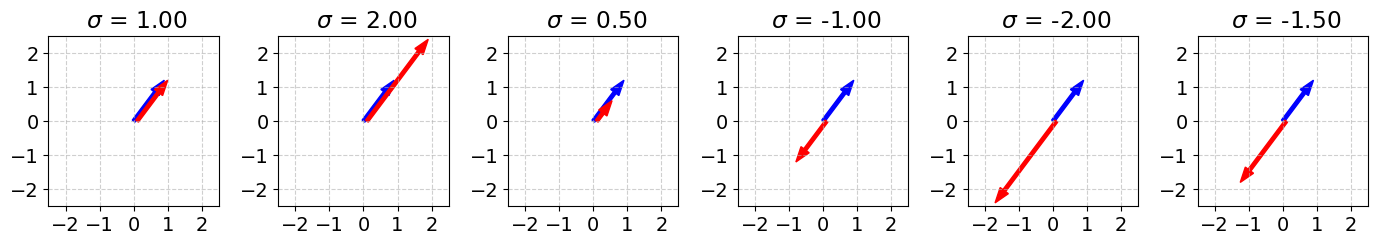

In [21]:
# Efeito de diferente valores escalares

# Lista de escalares
valores_escalares = [1, 2, 1/2, -1, -2, -1.5]
print(f'Valores escalares: {valores_escalares}')

# Vetor
vetor_inicial = np.array([.9, 1.2])
print(f'vetor inicial: {vetor_inicial}')

# cria a figura
fig, axs = plt.subplots(1, len(valores_escalares), figsize=(14, 5))

# contador para os subplos
i = 0
for valor in valores_escalares:
    # multiplicação escalar
    vetor_resultante = valor * vetor_inicial
    
    # plot do vetor inicial
    axs[i].arrow(0, 0, vetor_inicial[0], vetor_inicial[1], head_width=.3, width=.1, color='blue', length_includes_head=True)
    
    # plot do vetor resultante
    axs[i].arrow(.1, 0, vetor_resultante[0], vetor_resultante[1], head_width=.3, width=.1, color='red', length_includes_head=True)
    

    axs[i].grid(linestyle='--', alpha=0.6) # grid 
    axs[i].axis('square') # formato 
    axs[i].axis([-2.5, 2.5, -2.5, 2.5]) # eixos
    axs[i].set(xticks=np.arange(-2, 3), yticks=np.arange(-2, 3)) # limites
    axs[i].set_title(rf' $\sigma$ = {valor:.2f}') 
    # axs[i].legend(['Vetor inicial', 'Vetor resultante']) # legenda
    i += 1 # contador

plt.tight_layout() # ajusta o tamanho da figura
plt.savefig('imagens/grafico_05.png', dpi=300, bbox_inches='tight')
plt.show()


### Cross product (Produto Vetorial) entre vetores no espaço vetorial

In [22]:
# define 2 vetores
A = np.array([5, 2, 3])
B = np.array([3, 2, 4])

# calculo o cross product
resultado = np.cross(A, B)
print(resultado)
print(type(resultado))
print(resultado.shape)

[  2 -11   4]
<class 'numpy.ndarray'>
(3,)


In [23]:
# entendendo a função cross
def cross_prod(a, b):
    resultado = [a[1] * b[2] - a[2] * b[1], 
                 a[2] * b[0] - a[0] * b[2], 
                 a[0] * b[1] - a[1] * b[0]
                ]
    return resultado

# executa função cross_prod
vetor_resultante = cross_prod(A, B)
print(vetor_resultante)
                 


[np.int64(2), np.int64(-11), np.int64(4)]


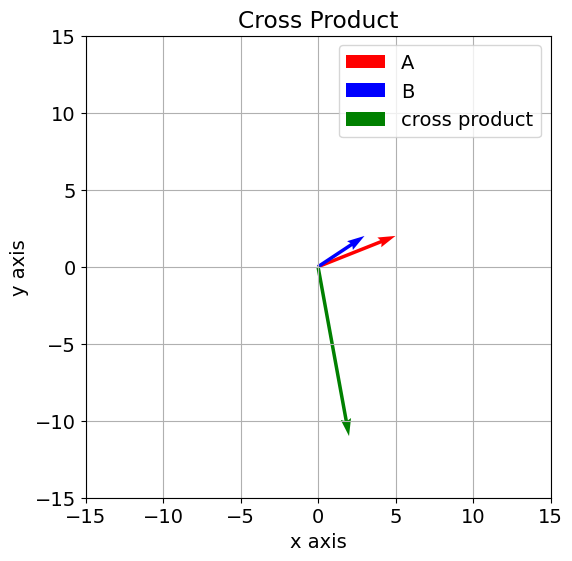

In [24]:
# plot dos vetores no cross product

plt.figure(figsize=(6, 6))

plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='A')
plt.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='b', label='B')
plt.quiver(0, 0, resultado[0], resultado[1], angles='xy', scale_units='xy', scale=1, color='g', label='cross product')

# definindo limites e caracteristicas
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.grid()
plt.legend()
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Cross Product')

# exibindo o grafico
plt.savefig('imagens/grafico_06.png', dpi=300)
plt.show()

#### Dot Product

In [25]:
resultado_dot = np.dot(A, B)
print(f'A = {A}')
print(f'B = {B}')
print(f'dot = {resultado_dot}')

A = [5 2 3]
B = [3 2 4]
dot = 31


In [26]:
# 3 vetores
u = np.array([1, 5])
v = np.array([6, 2])
w = np.array([19, 4])

# opção 1 de calcular dot product com 3 vetores
resultado_dot_1 = np.dot(u, v+w)
print(f"resultado_dot_1 = {resultado_dot_1}")

# opção 2 de calcular dot product com 3 vetores
resultado_dot_2 = np.dot(u, v) + np.dot(u, w)
print(f"resultado_dot_2 = {resultado_dot_2}")

resultado_dot_1 = 55
resultado_dot_2 = 55


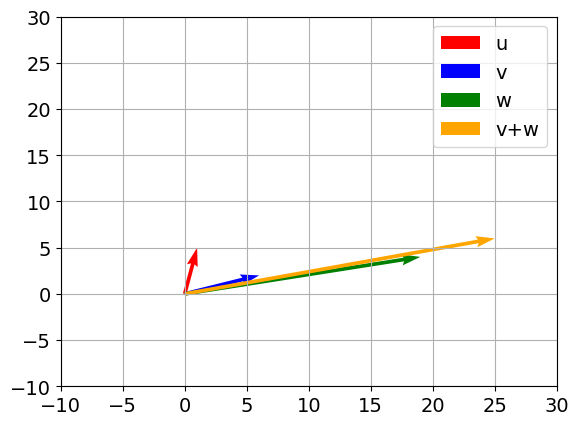

In [27]:
# plotando vetores no grafico
vw_sum = v + w

plt.figure()

#adicionando os vetores u, v, w e vw_sum ao gráfico
plt.quiver(0, 0, u[0], u[1], color='r', scale=1, scale_units='xy', angles='xy', label='u')
plt.quiver(0, 0, v[0], v[1], color='b', scale=1, scale_units='xy', angles='xy', label='v')
plt.quiver(0, 0, w[0], w[1], color='g', scale=1, scale_units='xy', angles='xy', label='w')
plt.quiver(0, 0, vw_sum[0], vw_sum[1], color='orange', scale=1, scale_units='xy', angles='xy', label='v+w')

# limites do gráfico
plt.xlim(-10, 30)
plt.ylim(-10, 30)

plt.grid()
plt.legend()
plt.savefig('imagens/grafico_07.png', dpi=300)
plt.show()



### Transposta do vetor

In [28]:
vec = np.array([1, 2, 3])
print(vec.shape)
print(vec)

transposta = vec.T
print(transposta.shape)
print(transposta)

(3,)
[1 2 3]
(3,)
[1 2 3]


In [29]:
# transposta da transposta
print(vec.T.T)

[1 2 3]


In [30]:
vec_1 = np.array([1, 2])
transposta_1 = vec_1.T 
print(transposta_1)
print(transposta_1.shape)

[1 2]
(2,)


## Exercicios


### 1 - Produto escalar em aplicação pratica

Dado dois vetores que representam preferências de usuários em três categorias diferentes, user1 = [4, 3, 2] e user2 = [1, 5, 4], calcule a similaridade entre esses usuários usando produto escalar

In [31]:
user1 = np.array([4, 3, 2])
user2 = np.array([1, 5, 4])

result = np.dot(user1, user2)
print(f'a similaridade entre esses usuários é: {result}')

a similaridade entre esses usuários é: 27


### 2 - Multiplicação de escalar por vetor em dados reais

Dada uma séria de preços de ações prices = [120, 125, 130, 128, 135], ajuste os preços em 15% e calcule o novo preço das ações

In [32]:
prices = np.array([120, 125, 130, 128, 135])
fator = 1.15

new_prices = prices * fator

print(new_prices)


[138.   143.75 149.5  147.2  155.25]


### 3 - Otimização de produto escalar
Encontre o vetor unitário que maximiza o produto escalar com o vetor v = [3, 4, 5]. Use técnicas de otimização para encontrar a solução

In [33]:
v = np.array([3, 4, 5])
norm_v = np.linalg.norm(v)
u = v / norm_v

print(f'Vetor otimizado do produto escalar: {u}')
prod_escalar = np.dot(v, u)
print(f'produto escalar: {prod_escalar:.1f}')


Vetor otimizado do produto escalar: [0.42426407 0.56568542 0.70710678]
produto escalar: 7.1


### 4 - Produto vetorial e direção normal
Dado três pontos no espaço 3D A=[1, 2, 3], B=[4, 5, 6] e C=[7, 8, 9], encontre um vetor normal ao plano definido por esses três pontos

In [34]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
C = np.array([7, 8, 9])

AB = B-A
AC = C-A

normal = np.cross(AB, AC)

print(f'Vetor normal ao plano: {normal}')



Vetor normal ao plano: [0 0 0]


### 5: Produto Vetorial em Análise de Dados
Em um conjunto de dados 3D com pontos p1 = [1, 2, 3], p2 = [4, 5, 6], e p3 =
[7, 8, 9], encontre o vetor normal ao plano formado por esses três pontos e interprete
seu significado em termos de orientação do plano.

In [35]:
p1 = np.array([1, 2, 3])
p2 = np.array([4, 5, 6])
p3 = np.array([7, 8, 9])

v1 = p2-p1
v2 = p3-p1

normal2 = np.cross(v1, v2)

print(f'vetor normal: {normal2}')

vetor normal: [0 0 0]


### Axiomas de operações com vetores no espaço vetorial em python

Um espaço vetorial, como o próprio nome indica, é o espaço para vetores, que define duas operações, **adição** e **multiplicação por escalares**, sujeitas aos axiomas abaixo:

1. Comutatividade da adição - a ordem da soma dos vetores não altera o resultado
$$ (u + v = v + u) $$
2. Associatividade da adição - a forma como agrupamos os vetores na soma não muda o resultado
$$ (u + (v + w) = (u + v) + w) $$
3. Elemento neutro da adição - adicionar um vetor nulo não altera o vetor original
- Existe um vetor nulo (0), tal que (v + 0 = v)
4. Elemento oposto (inverso aditivo) - cada vetor tem um oposto que, somado a ele, resulta no vetor nulo
- Para cada vetor (v), existe um vertor (-v), tal que (v + (-v) = 0)
5. Associatividade da multiplicação escalar - a ordem da multiplicação dos escalares não interfere no resultado final
$$ (a(bv)=(ab)v) $$
6. Elemento neutro da multiplicação escalar - multiplicar um vetor por 1 não altera o vetor
$$ (1 \cdot v=v) $$
7. Distributividade da multiplicação escalar em relação à **adição de vetores** - o escalar pode ser distribuido sore a soma de vetores
$$(a(u+v) = au + av)$$
8. Distributividade da multiplicação escalar em relação à **adição de escalares** - a soma de escalares pode ser distribuida sobre o vetor
$$ ((a + b)v = av + bv) $$

Todos os axiomas são autoexplicativos, mas vamos representar um deles em Liguagem python. Podemos visualizar o axioma 7 com uma função em python.



Vetor u: (-1, 3)
Vetor v: (5, -1)
Soma de u + v: (4, 2)
Escalar c: 2
Multiplicação de c e u: (-2, 6)
Multiplicação de c e v: (10, -2)
Multiplicação de c e u: (8, 4)


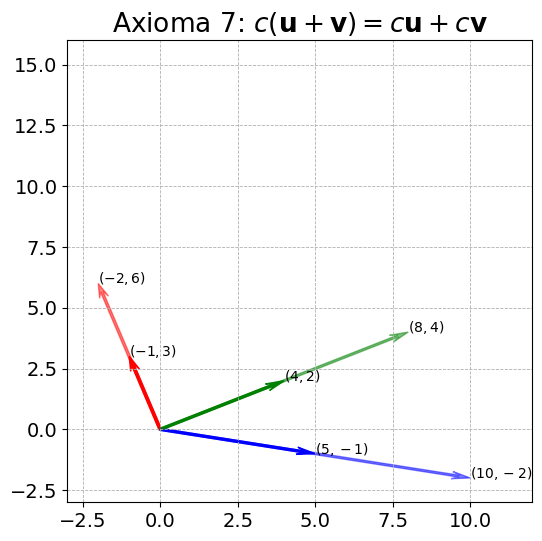

In [ ]:
# função para o axioma 7
def func_axioma7(u, v, c):
    fig, ax = plt.subplots(figsize = (6, 6)) #cria figura e subplots
    
    # seta para o vetur u (passado como argumento na função)
    ax.arrow(0, 0, 
             u[0],
             u[1], 
             color='red', width=.08, length_includes_head=True, head_width=.3, head_length=.6, overhang=.4)
    
    # Seta para o vetor v (passando como argumento na função)
    ax.arrow(0, 0, 
             v[0], 
             v[1], 
             color='blue', width=.08, length_includes_head=True, head_width=.3, head_length=.6, overhang=.4)
    
    # Operação de soma entre vetores u e v (apenas para demonstrar no gráfico)
    ax.arrow(0, 0, 
             u[0] + v[0], 
             u[1] + v[1], 
             color='green', width=.08, length_includes_head=True, head_width=.3, head_length=.6, overhang=.4)
    
    # Operação de multiplicação entre o escalar c e o vetor u
    # O valor de c é passado como argumento da função
    ax.arrow(0, 0, 
             c * u[0], 
             c * u[1], 
             color='red', width=.08, alpha=.5, length_includes_head=True, head_width=.3, head_length=.6, overhang=.4)
    
    # Operação de multiplicação entre o escalar c e o vetor v
    # O valor de c é passado como argumento da funçao
    ax.arrow(0, 0, 
             c * v[0], 
             c * v[1], 
             color='blue', width=.08, alpha=.5, length_includes_head=True, head_width=.3, head_length=.6, overhang=.4)
    
    # Operação entre o escalar c e os vetores u e v (conforme axioma 7)
    ax.arrow(0, 0, 
             c * (u[0] + v[0]), 
             c * (u[1] + v[1]), 
             color='green', width=.08, alpha=.5, length_includes_head=True, head_width=.3, head_length=.6, overhang=.4)
    
    # representar texto no gráfico
    
    # Coordenadas do vetor u
    ax.text(x = u[0],
            y = u[1], 
            s=r'$(%d, %d)$' % (u[0], u[1]), size=10)
    print(f'Vetor u: ({u[0]}, {u[1]})')
    
    # Coordenadas do vetor v
    ax.text(x = v[0], 
            y = v[1], 
            s=r'$(%d, %d)$' % (v[0], v[1]), size=10)
    print(f'Vetor v: ({v[0]}, {v[1]})')
    
    # Coordenadas do vetor resultante da soma entre u e v
    ax.text(x = u[0] + v[0], 
            y = u[1] + v[1], 
            s=r'$(%d, %d)$' % (u[0] + v[0], u[1] + v[1]), size=10)
    print(f'Soma de u + v: ({u[0] + v[0]}, {u[1] + v[1]})')
    
    # Coordenadas do vetor resultante da multiplicação entre c e u
    ax.text(x = c * u[0], 
            y = c * u[1], 
            s = r'$(%d, %d)$' % (c * u[0], c * u[1]), size=10)
    print(f'Escalar c: {c}')
    print(f'Multiplicação de c e u: ({c * u[0]}, {c * u[1]})')
    
    # Coordenadas do vetor resultante da multiplicação entre c e v
    ax.text(x = c * v[0], 
            y = c * v[1], 
            s = r'$(%d, %d)$' % (c * v[0], c * v[1]), size=10)
    print(f'Multiplicação de c e v: ({c * v[0]}, {c * v[1]})')
    
    # Coordenadas do vetor resultante da multiplicação entre c e a soma de u + v
    ax.text(x = c * (u[0] + v[0]), 
            y = c * (u[1] + v[1]), 
            s = r'$(%d, %d)$' % (c * (u[0] + v[0]), c * (u[1] + v[1])), size=10)
    print(f'Multiplicação de c e u: ({c * (u[0] + v[0])}, {c * (u[1] + v[1])})')
    
    # Título
    ax.set_title(r'Axioma 7: $c(\mathbf{u}+\mathbf{v})=c \mathbf{u}+c \mathbf{v}$', 
                 size=19, color='black')
    
    # usamos matemática para expandir as coordenadas do gráfico de acordo com os vetores
    ax.axis([-3, np.max(c * u) + 6, -3, np.max(c * v) + 6])
    ax.grid(linestyle='--', linewidth=.6)
    
# definindo alguns valores de exemplo e executamos a função
# u = np.array([2, 3])
# v = np.array([3, 1])

# u = np.array([1, 3])
# v = np.array([5, 2])

u = np.array([-1, 3])
v = np.array([5, -1])

c = 2
func_axioma7(u, v, c)


### Espaço vetorial com funções trigonométricas

O espaço vetorial tem um significado mais geral do que conter vetores. As funções e polinômios podem estar no espaço vetorial, como mostraremos no próximo capítulo com a dependência linear.
Em matemática, um espaço funcional (funcion space) é um conjunto de funções entre dois conjuntos fixos. Ou seja, é um espaço vetorial para funções. 
podemos demonstrar o espaço vetorial para funções plotando duas funções trigonométricas: sin(x1) e cos(x2) com o stem plot, sua adição no espaço vetorial é a área sombreada com os valores possíveis
Considere as listas de valores abaixo de x1 e x2:
- x1 = np.arange(-5, 5, 0.3)
- x2 = np.arange(-5.1, 4,9, 0.3)
Podemos dizer que o seno(x1) e cosseno(x2) são linearmente independentes?

As funções são linearmente independente em um tipo de espaço vetorial chamado espaço funcional. Neste espaço vetorial, o vetor zero é a função f(x) = 0

**Dizer que seno(x1) e cosseno(x2) são linearmente independentes é dizer que nenhuma combinação linear de seno(x1) e cosseno(x2) resulta na função zero**

- $f(x), g(x)$ são independentes se existir $ (a, b) \in \mathbb{R} \quad \text{tal que} \quad a \ne 0 \quad \text{ou} \quad b \ne 0 $
- $af(x) + bg(x) = 0 $

Vamos criar um plot e verificar. Lembrando que seno e cosseno são funções e não vetores.



Valores de y3 = (a * np.sin(x1)) + (b * np.cos(x2)): 
 [ 1.71487976  1.17492122  0.53001048 -0.16224453 -0.84000672 -1.4427336
 -1.9165854  -2.21923432 -2.32364566 -2.22049264 -1.91898964 -1.446069
 -0.84397533 -0.16649185  0.52586385  1.17124569  1.71200365  2.09983342
  2.30009132  2.29488892  2.08469092  1.68827369  1.14104801  0.4918959
 -0.20119581 -0.87631529 -1.47315613 -1.93840433 -2.23050064 -2.32335297
 -2.2086671  -1.89668758 -1.4152826  -0.80745465]


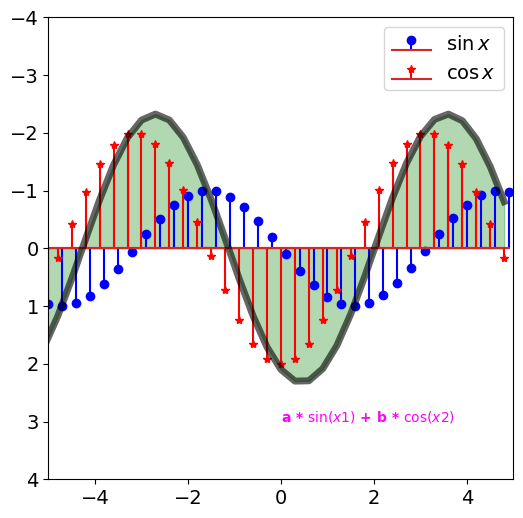

In [ ]:
from pyparsing import alphas


def verifica_linear_dep(x1, x2, a, b):
    
    fig, ax = plt.subplots(figsize = (6, 6)) # Cria figura e subplots
    
    # Define y1 com a função seno de x1a
    y1 = a * np.sin(x1)
    
    # Plot de x1 e y1 (linhas verticais em azul)
    ax.stem(x1, y1, linefmt='blue', label=r'$\sin{x}$', markerfmt='o')
    
    # Define y2 com a função cosseno de x2
    y2 = b * np.cos(x2)
    
    # plot de x2 e y2 (linhas verticais em vermelho)
    ax.stem(x2, y2, linefmt='red', label=r'$\cos{x}$', markerfmt='*')
    
    # Define y3 com a soma da função de seno de x1 com a função cosseno de x2
    y3 = (a * np.sin(x1)) + (b * np.cos(x2))
    print(f'Valores de y3 = (a * np.sin(x1)) + (b * np.cos(x2)): \n {y3}')
    
    # Plot de x2 e y3
    ax.plot(x2, y3, lw=5, color='black', alpha=.6)
    
    # Função para preencher
    ax.fill_between(x2, y3, 0, color='green', alpha=.3)
    
    # String
    str1 = r'a * $\sin(x1)$ + b * $\cos(x2)$'
    
    # texto no gráfico
    ax.annotate(str1,
                xy = (1, a * (np.sin(1) + b * np.cos(1))),
                xytext = (0, 3),
                weight = 'bold',
                color = 'magenta',
                fontsize = 10
                )
    
    # Coordenadas dos eixos
    ax.axis([-5, 5, 4, -4])
    ax.legend()
    
    
# Define os valores para x1 e x2
x1 = np.arange(-5, 5, 0.3)
x2 = np.arange(-5.1, 4.9, 0.3)
a = 1
b = 2

# Executa a função
verifica_linear_dep(x1, x2, a, b)

Duas funções são linearmente dependentes se houver uma maneira de formar uma combinação linear para obter a função zero (que é zero para qualquer possível escolha de x).

**Para que as funções de $x$ sejam linearmente independentes, a função zero deve existir para todos os valores de $x$, não para para alguns**

Então podemos dizer que $sin(x1)$ e $cos(x2)$ são linearmente independentes.

### Subespaço em álgebra linear

Um subespaço é um dos conceitos mais imporantes da álgebra linear. 
Um subespaço reside em um espaço vetorial **$V$**, que podemos denotar como **$H$**. Apenas duas propriedades precisam ser verificadas:
1. **$H$** tem vetor zero
2. Podemos realizar adição vetorial e multiplicação escalar

Existem dois fatos sobre os subespaços:
1. Qualquer linha que passa (0, 0) em $\mathbb{R}^2$ é um subespaço de $\mathbb{R}^2$
2. Qualquer plano que passa (0, 0, 0) em $\mathbb{R}^3$ e um subespaço de $\mathbb{R}^3$ 

A seguir, vamos visualizar o subespaço


#### Visualização do subespaço em  $\mathbb{R}^2$

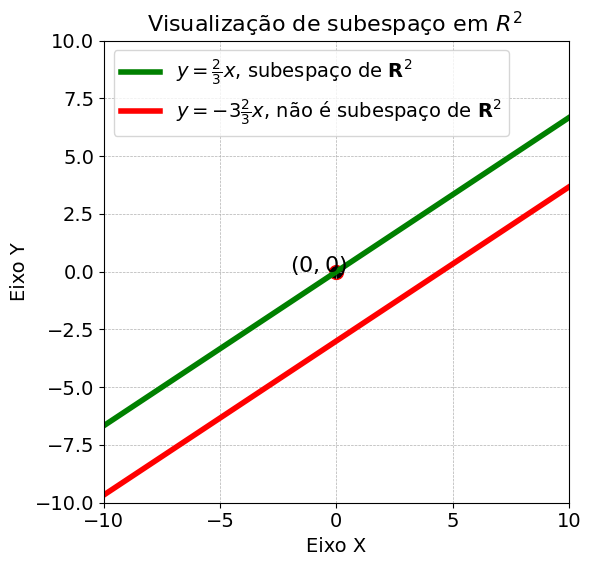

In [108]:
fig, ax = plt.subplots(figsize=(6, 6)) # cria a figura

# valores de x e y
x = np.arange(-10, 11, 1)
y = 4/6*x

# plot
ax.plot(x, y, lw=4, color='green', label=r'$y = \frac{2}{3}x$, subespaço de $\mathbf{R}^2$')

# novo valor de y
y = -3+4/6*x

# plot
ax.plot(x, y, lw=4, color='red', label=r'$y = -3\frac{2}{3}x$, não é subespaço de $\mathbf{R}^2$')

# grid
ax.grid(linestyle='--', linewidth=.5)

# título
ax.set_title('Visualização de subespaço em $R^2$ ', size=16)

# scatter plot
ax.scatter(0, 0,
           s=100, fc='black', ec='red')

# # texto e legenda
ax.text(x = -2,
        y = 0, 
        s = r'$(0, 0)$', size=16)
ax.legend(fontsize=14)

# Coordenadas dos eixos
ax.axis([-10, 10, -10, 10])

# labels
ax.set_xlabel('Eixo X', size=14)
ax.set_ylabel('Eixo Y', size=14)

plt.show()

#### Visualização de subespaço em $\mathbb{R}^3$

Considere um intervalo de dois vetores $ u = (1, -2, 1)^s $ e $ v = (2, 1, 2)^t $. O intervalo de (u, v) é um subespaço de $ \mathbb{R}^3 $, onde, $s$ e $t$ são escalares dos vetores
$$
\begin{bmatrix}
x \\ y \\ z
\end{bmatrix}
= 
s 
\begin{bmatrix}
1 \\ -2 \\ 1
\end{bmatrix}
+ t
\begin{bmatrix}
2 \\ 1 \\ 2
\end{bmatrix}
=
\begin{bmatrix}
s + 2t \\ -2s + t \\ s + 2t 
\end{bmatrix}
$$

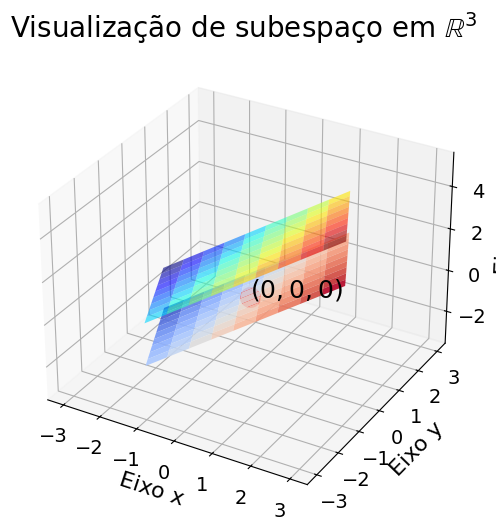

In [ ]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d') # projeção 3d

# valores de s e t
s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)

S, T = np.meshgrid(s, t) #grid 

# valores de x, y e z
X = S + 2 * T
Y = -2 * S + T
Z = S + 2 * T

ax.plot_surface(X, Y, Z, alpha=.9, cmap=plt.cm.coolwarm) #plot 

Z2 = S + 2 * T + 2 # isso não é mais um subespaço

ax.plot_surface(X, Y, Z2, alpha=.6, cmap=plt.cm.jet)

# scatter
ax.scatter(0, 0, 0, s=200, color='red')

# texto
ax.text(0, 0, 0, '$(0, 0, 0)$', size=18, zorder=5)

ax.set_title(r'Visualização de subespaço em $\mathbb{R}^3$', x=.5, y=1.1, size=20)

#labels
ax.set_xlabel('Eixo x', size=16)
ax.set_ylabel('Eixo y', size=16)
ax.set_zlabel('Eixo z', size=16)
plt.show()

#### Operações com tensores em $\mathbb{R}^4$

Para criar dois tensores de quatro dimensões e realizar uma operação de produto escalar (dot product) entre eles, devemos primeiro esclarecer como o produto escalar é definido para tensores de ordem superior. Em tensores de dimensões superiores, o produto escalar pode não ser direto como em vetores ou matrizes.

No entanto, uma arbodagem comum é tratar os tensores de ordem superior como coleções de matrizes ou vetores e realizar operações de produto escalar entre essas matrizes ou vetores correspondentes. Para tensores 4D, podemos visualizar como uma coleção de matrizes 3D, onde podemos calcular o produtor escalar entre matrizes correspondentes.

Vamos criar dois tensores 4D aleatórios e realizar uma operação que se assemelha a um "produto escalar" entre eles, tratando-os como coleções de matrizes 3D. Neste caso, vamos calcular a soma dos produtos escalares das matrizes correspondentes em cada tensor.

O resultado da operação que se assemelha a um "produto escalar" entre os dois tensores 4D aleatórios é aproximadamente 23.48

Neste cálculo, tratamos cada tensor como uma coleção de matrizes 3D e calculamos a soma dos produtos escalares de todas as matrizes correspondentes entre os dois tensores.

É importante notar que essa abordagem é uma das várias maneiras de se realizar operações entre tensores de alta ordem, e a definição específica do "produto escalar" pode variar dependendo do contexto e da aplicação.

In [114]:
# Criando dois tensores 4D
tensor1 = np.random.rand(3, 3, 3, 3) # tensor com dimensões 3x3x3x3
tensor2 = np.random.rand(3, 3, 3, 3) # tensor com dimensões 3x3x3x3
print(f'tensor1 shape{tensor1.shape}')
print(f'tensor2 shape{tensor2.shape}')

tensor1 shape(3, 3, 3, 3)
tensor2 shape(3, 3, 3, 3)


In [115]:
print(tensor1)

[[[[0.73033435 0.42876846 0.53771772]
   [0.30895028 0.95734518 0.08240632]
   [0.47292888 0.42436896 0.96983139]]

  [[0.70729874 0.30047489 0.14294221]
   [0.16312312 0.1362187  0.815757  ]
   [0.12321523 0.91944446 0.45127711]]

  [[0.28652806 0.70397408 0.67638517]
   [0.12537052 0.75347272 0.97742914]
   [0.62515508 0.35978083 0.56596741]]]


 [[[0.97644822 0.62556799 0.64030832]
   [0.02514151 0.6667882  0.12627409]
   [0.53687132 0.81396228 0.84756926]]

  [[0.22558714 0.29719799 0.09333217]
   [0.22430986 0.88432359 0.24581951]
   [0.68336967 0.75942644 0.49968859]]

  [[0.98412676 0.59642675 0.09078336]
   [0.28530825 0.90643267 0.55283651]
   [0.88132544 0.05267529 0.82747734]]]


 [[[0.43836385 0.02827199 0.57766449]
   [0.35210446 0.39893094 0.19201747]
   [0.83009593 0.63070162 0.00336524]]

  [[0.2526654  0.49875961 0.74594342]
   [0.29892801 0.25090871 0.91134113]
   [0.00738376 0.70956317 0.3982072 ]]

  [[0.5089657  0.22980818 0.76873461]
   [0.73108249 0.67180585 0.00

In [118]:
# realizando a operação "produto escalar" entre os tesores
# tratando cada tensor como uma coleção de matrizes 3D
prod_escalar = 0
for i in range(tensor1.shape[0]):
    for j in range(tensor1.shape[1]):
        prod_escalar += np.tensordot(tensor1[i, j], tensor2[i, j])
        
print(f'Produto escalar: {prod_escalar:.2f}')

Produto escalar: 17.86
